In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#OJUELOS
ojuelos2 = pd.read_csv("Estados estaciones nuevo/ojuelosestado2.csv")
ojuelos2["date"] = pd.to_datetime(ojuelos2["date"])
ojuelos2.index = ojuelos2["date"]
del ojuelos2["date"]

ojuelos4 = pd.read_csv("Estados estaciones nuevo/ojuelosestado4.csv")
ojuelos4["date"] = pd.to_datetime(ojuelos4["date"])
ojuelos4.index = ojuelos4["date"]
del ojuelos4["date"]


#MERIDA
merida1 = pd.read_csv("Estados estaciones nuevo/meridaestado1.csv")
merida1["date"] = pd.to_datetime(merida1["date"])
merida1.index = merida1["date"]
del merida1["date"]

merida3 = pd.read_csv("Estados estaciones nuevo/meridaestado3.csv")
merida3["date"] = pd.to_datetime(merida3["date"])
merida3.index = merida3["date"]
del merida3["date"]


#VENTOSA
ventosa = pd.read_csv("Estados estaciones nuevo/ventosaestado.csv")
ventosa["date"] = pd.to_datetime(ventosa["date"])
ventosa.index = ventosa["date"]
del ventosa["date"]


#SAN FERNANDO
sanfer1 = pd.read_csv("Estados estaciones nuevo/sanferestado1.csv")
sanfer1["date"] = pd.to_datetime(sanfer1["date"])
sanfer1.index = sanfer1["date"]
del sanfer1["date"]

sanfer3 = pd.read_csv("Estados estaciones nuevo/sanferestado3.csv")
sanfer3["date"] = pd.to_datetime(sanfer3["date"])
sanfer3.index = sanfer3["date"]
del sanfer3["date"]


#TEPEXI
tepexi1 = pd.read_csv("Estados estaciones nuevo/tepexiestado1.csv")
tepexi1["date"] = pd.to_datetime(tepexi1["date"])
tepexi1.index = tepexi1["date"]
del tepexi1["date"]

tepexi3 = pd.read_csv("Estados estaciones nuevo/tepexiestado3.csv")
tepexi3["date"] = pd.to_datetime(tepexi3["date"])
tepexi3.index = tepexi3["date"]
del tepexi3["date"]


#CUAHUTEMOC
cuau4 = pd.read_csv("Estados estaciones nuevo/cuauestado4.csv")
cuau4["date"] = pd.to_datetime(cuau4["date"])
cuau4.index = cuau4["date"]
del cuau4["date"]

cuau2 = pd.read_csv("Estados estaciones nuevo/cuauaestado2.csv")
cuau2["date"] = pd.to_datetime(cuau2["date"])
cuau2.index = cuau2["date"]
del cuau2["date"]


#RUMOROSA
rumorosa4 = pd.read_csv("Estados estaciones nuevo/rumorosaestado4.csv")
rumorosa4["date"] = pd.to_datetime(rumorosa4["date"])
rumorosa4.index = rumorosa4["date"]
del rumorosa4["date"]

rumorosa3 = pd.read_csv("Estados estaciones nuevo/rumorosaestado3.csv")
rumorosa3["date"] = pd.to_datetime(rumorosa3["date"])
rumorosa3.index = rumorosa3["date"]
del rumorosa3["date"]

In [3]:
ojuelos2["index"] = ojuelos2.index 
ojuelos2.drop_duplicates(subset='index', inplace=True) 
del ojuelos2["index"]
ojuelos2.shape

(51068, 1)

In [4]:
merida1["index"] = merida1.index 
merida1.drop_duplicates(subset='index', inplace=True) 
del merida1["index"]
merida1.shape

(48056, 1)

In [5]:
ventosa["index"] = ventosa.index 
ventosa.drop_duplicates(subset='index', inplace=True) 
del ventosa["index"]
ventosa.shape

(52367, 1)

In [6]:
sanfer3["index"] = sanfer3.index 
sanfer3.drop_duplicates(subset='index', inplace=True) 
del sanfer3["index"]
sanfer3.shape

(52520, 1)

In [7]:
tepexi3["index"] = tepexi3.index 
tepexi3.drop_duplicates(subset='index', inplace=True) 
del tepexi3["index"]
tepexi3.shape

(52461, 1)

In [8]:
rumorosa4["index"] = rumorosa4.index 
rumorosa4.drop_duplicates(subset='index', inplace=True) 
del rumorosa4["index"]
rumorosa4.shape

(49326, 1)

In [9]:
cuau2["index"] = cuau2.index 
cuau2.drop_duplicates(subset='index', inplace=True) 
del cuau2["index"]
cuau2.shape

(52488, 1)

In [10]:
np.random.seed(0)
rng = pd.date_range('2018-01-01', periods=52560, freq='10min')
df = pd.DataFrame({ 'Val' : np.random.randn(len(rng)) }, index=rng)  
df["date"] = df.index
df["date"] = pd.to_datetime(df["date"])
df.index = df["date"]
del df["date"]
df

,Val
date,
2018-01-01 00:00:00,1.764052
2018-01-01 00:10:00,0.400157
2018-01-01 00:20:00,0.978738
2018-01-01 00:30:00,2.240893
2018-01-01 00:40:00,1.867558
...,...
2018-12-31 23:10:00,0.759434
2018-12-31 23:20:00,1.260258
2018-12-31 23:30:00,-0.672022


In [11]:
def juntar(left, right):
    return pd.merge(left, right, on='date', how='outer')

In [12]:
#Datadinal2 
#Esta tabla representa a través de 0s y 1s si una estación está activa en un Estado de viento productor, es decir,
#si en una determinada estación meteorológica se encuentra activo un estado de viento productor, se indica con el valor de 1,
#por el contrario si está incativo se indica con 0. La columna Total indica el Total de Estados de viento productores activos 
#en todo el país.
#Los espacios vacíos los rellena con 0.0
dfinal2 = reduce(juntar, [df,ventosa,rumorosa3,rumorosa4,merida1,merida3,ojuelos2,ojuelos4,cuau2,cuau4,sanfer1,sanfer3,tepexi1,tepexi3])
dfinal2.sort_values(by='date', inplace=True)
dfinal2["index"] = dfinal2.index 
dfinal2.drop_duplicates(subset='index', inplace=True) 
del dfinal2["index"]
del dfinal2["Val"]
dfinal2.columns = ["Ventosa1","Rumorosa3","Rumorosa4","Mérida1","Mérida3","Ojuelos2","Ojuelos4","Cuahutemoc2","Cuahutemoc4","San Fernando1","San Fernando3","Tepexi1","Tepexi3"]
dfinal2 = dfinal2.fillna(0.0)
dfinal2["Total"] = dfinal2["Ventosa1"] + dfinal2["Rumorosa3"] + dfinal2["Rumorosa4"] + dfinal2["Mérida1"] + dfinal2["Mérida3"] + dfinal2["Ojuelos2"] + dfinal2["Ojuelos4"] + dfinal2["Cuahutemoc2"] + dfinal2["Cuahutemoc4"] + dfinal2["San Fernando1"] + dfinal2["San Fernando3"] + dfinal2["Tepexi1"] + dfinal2["Tepexi3"]

dfinal2

,Ventosa1,Rumorosa3,Rumorosa4,Mérida1,Mérida3,Ojuelos2,Ojuelos4,Cuahutemoc2,Cuahutemoc4,San Fernando1,San Fernando3,Tepexi1,Tepexi3,Total
date,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
2018-01-01 00:10:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
2018-01-01 00:20:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
2018-01-01 00:30:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
2018-01-01 00:40:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
2018-12-31 23:20:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
2018-12-31 23:30:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [13]:
dfinal2["2018-06-09":"2018-06-30"].Total.mean()-dfinal2.Total.mean()

-0.9424960218624601

In [14]:
#Esta tabla representa a través de 0s y 1s si una estación está activa en un Estado de viento productor, es decir,
#si en una determinada estación meteorológica se encuentra activo un estado de viento productor, se indica con el valor de 1,
#por el contrario si está incativo se indica con 0. La columna Total indica el Total de Estados de viento productores activos 
#en todo el país.
#dfinal los espacios vacíos los rellena con 0.15
dfinal = reduce(juntar, [df,ventosa,rumorosa3,rumorosa4,merida1,merida3,ojuelos2,ojuelos4,cuau2,cuau4,sanfer1,sanfer3,tepexi1,tepexi3])
dfinal.sort_values(by='date', inplace=True)
dfinal["index"] = dfinal.index 
dfinal.drop_duplicates(subset='index', inplace=True) 
del dfinal["index"]
del dfinal["Val"]
dfinal.columns = ["Ventosa1","Rumorosa3","Rumorosa4","Mérida1","Mérida3","Ojuelos2","Ojuelos4","Cuahutemoc2","Cuahutemoc4","San Fernando1","San Fernando3","Tepexi1","Tepexi3"]
dfinal = dfinal.fillna(0.15)
dfinal["Total"] = dfinal["Ventosa1"] + dfinal["Rumorosa3"] + dfinal["Rumorosa4"] + dfinal["Mérida1"] + dfinal["Mérida3"] + dfinal["Ojuelos2"] + dfinal["Ojuelos4"] + dfinal["Cuahutemoc2"] + dfinal["Cuahutemoc4"] + dfinal["San Fernando1"] + dfinal["San Fernando3"] + dfinal["Tepexi1"] + dfinal["Tepexi3"]

dfinal


,Ventosa1,Rumorosa3,Rumorosa4,Mérida1,Mérida3,Ojuelos2,Ojuelos4,Cuahutemoc2,Cuahutemoc4,San Fernando1,San Fernando3,Tepexi1,Tepexi3,Total
date,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,0.0,0.0,1.0,0.0,0.15,0.15,0.0,0.0,1.0,0.0,1.0,0.0,4.3
2018-01-01 00:10:00,1.0,0.0,0.0,1.0,0.0,0.15,0.15,0.0,0.0,1.0,0.0,1.0,0.0,4.3
2018-01-01 00:20:00,1.0,0.0,0.0,1.0,0.0,0.15,0.15,0.0,0.0,1.0,0.0,1.0,0.0,4.3
2018-01-01 00:30:00,1.0,0.0,0.0,1.0,0.0,0.15,0.15,0.0,0.0,1.0,0.0,1.0,0.0,4.3
2018-01-01 00:40:00,1.0,0.0,0.0,0.0,0.0,0.15,0.15,0.0,0.0,1.0,0.0,1.0,0.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,1.0,1.0,0.0,0.0,1.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,4.0
2018-12-31 23:20:00,1.0,1.0,0.0,0.0,1.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,4.0
2018-12-31 23:30:00,1.0,1.0,0.0,0.0,1.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [15]:
#EXPORTAMOS dfinal2 COMO TransiciónEstados. Esta es la tabla que indica el total de Estados de viento activos en un momento
#determinado a lo largo del país.
dfinal2.to_csv("TransiciónEstados.csv")

In [16]:
#Promedio de Estados de viento productivos activos a lo largo del periodo de estudio
dfinal2["Total"].mean()
dfinal2["Total"].std()

1.4878571309959212

In [17]:
#Indica el número total de veces que que ningún Estado de viento productor estuvo activo a lo largo del periodo de estudio
Total0 = pd.value_counts((dfinal2["Total"] < 1) & (dfinal2["Total"] >= 0))
Total0 = Total0[1]
Total0

847

In [18]:
#Indica el número total de veces que 1 y sólamente 1 Estado de viento productor estuvo activo a lo largo del periodo de estudio
Total1 = pd.value_counts((dfinal2["Total"] < 2) & (dfinal2["Total"] >= 1))
Total1 = Total1[1]
Total1

3332

In [19]:
#Indica el número total de veces que 2 y sólamente 2 Estados de viento productores estuvieron activos a lo largo 
#del periodo de estudio
Total2 = pd.value_counts((dfinal2["Total"] < 3) & (dfinal2["Total"] >= 2))
Total2 = Total2[1]
Total2

8598

In [20]:
#Indica el número total de veces que 3 y sólamente 3 Estados de viento productores estuvieron activos a lo largo 
#del periodo de estudio
Total3 = pd.value_counts((dfinal2["Total"] < 4) & (dfinal2["Total"] >= 3))
Total3 = Total3[1]
Total3

12024

In [21]:
Total4 = pd.value_counts((dfinal2["Total"] < 5) & (dfinal2["Total"] >= 4))
Total4 = Total4[1]
Total4

13036

In [22]:
Total5 = pd.value_counts((dfinal2["Total"] < 6) & (dfinal2["Total"] >= 5))
Total5 = Total5[1]
Total5

9452

In [23]:
Total6 = pd.value_counts((dfinal2["Total"] < 7) & (dfinal2["Total"] >= 6))
Total6 = Total6[1]
Total6

4315

In [24]:
#Indica el número total de veces que todos los Estados de viento productores estuvieron activos
Total7 = pd.value_counts((dfinal2["Total"] < 8) & (dfinal2["Total"] >= 7))
Total7 = Total7[1]
Total7

956

In [25]:
#Corroboración de la información
Total0 + Total1 + Total2 + Total3 + Total4 + Total5 + Total6 + Total7

52560

In [26]:
#Porcentajes de tiempo que estuvieron activos ya sea 1,2,3,4,5,6 o 7 Estados de viento a lo largo del periodo de estudio
Totalporcentaje0 = Total0/52560 #Porcentaje de tiempo que no hubo ningún Estado de viento productor activo
Totalporcentaje1 = Total1/52560
Totalporcentaje2 = Total2/52560
Totalporcentaje3 = Total3/52560 #Porcentaje de tiempo que 3 y solamente 3 Estados de viento productores estuvieron activos
Totalporcentaje4 = Total4/52560
Totalporcentaje5 = Total5/52560
Totalporcentaje6 = Total6/52560
Totalporcentaje7 = Total7/52560 #Porcentaje de tiempo que todos los Estados de viento productores estuvieron activos

In [27]:
Totalporcentaje0

0.016114916286149163

In [28]:
#Creamos un dataframe para visualizar más facilmente la información obtenida en las celdas superiores
data_estados = {"Total de apariciones": [Total0, Total1, Total2, Total3, Total4, Total5, Total6, Total7], "Porcentaje del total": [Totalporcentaje0, Totalporcentaje1, Totalporcentaje2, Totalporcentaje3, Totalporcentaje4, Totalporcentaje5, Totalporcentaje6, Totalporcentaje7]}
df_estados = pd.DataFrame(data=data_estados)
df_estados

,Total de apariciones,Porcentaje del total
0,847,0.016115
1,3332,0.063394
2,8598,0.163584
3,12024,0.228767
4,13036,0.248021
5,9452,0.179833
6,4315,0.082097
7,956,0.018189


In [29]:
#EXPORTAMOS df_estados COMO df_estados. Exportamos el dataframe recién generado que contiene la información del porcentaje de 
#tiempo que estuvieron activos ya sea 0,1,2,3,4,5,6 o 7 Estados de viento productores
df_estados.to_csv("df_estados.csv")

In [30]:
#Leemos el archivo que contiene los datos de demanda eléctrica
demanda = pd.read_csv("Datos_generación.csv")
demanda

,Tiempo,CEN,NES,NOR,NTE,OCC,ORI,PEN,SIN
0,2018-01-01 00:00:00,2676.94600,8320.797000,1778.86500,1914.53200,2957.63000,6301.388000,266.166000,24216.324000
1,2018-01-01 01:00:00,2488.61400,8034.734000,1502.07200,1929.59400,3022.96400,6085.509000,268.000000,23331.487000
2,2018-01-01 02:00:00,2065.20600,7638.945000,1478.92800,1894.61900,3085.62700,6116.089000,266.964000,22546.378000
3,2018-01-01 03:00:00,1763.00931,7411.874863,1472.89925,1863.02880,3069.79990,5987.084288,268.546170,21836.242582
4,2018-01-01 04:00:00,1761.73800,6820.834000,1450.52000,1763.77700,3171.85800,5822.222000,269.896000,21060.845000
...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,3509.99159,8884.646620,2155.56309,2443.57719,4201.59740,7370.370160,574.985826,29140.731876
8756,2018-12-31 20:00:00,3622.88152,8933.840720,2384.32414,2529.37948,4252.26790,7851.013500,585.283170,30158.990430
8757,2018-12-31 21:00:00,3300.48764,8870.925190,2200.49766,2533.81224,3849.17050,7564.690910,531.960433,28851.544573
8758,2018-12-31 22:00:00,2892.59227,8878.092380,2016.83504,2483.07744,3320.52039,7181.658260,452.326970,27225.102750


In [31]:
#Transformamos a formato datetime
demanda["Tiempo"] = pd.to_datetime(demanda["Tiempo"])
demanda.index = demanda["Tiempo"]

(array([15000., 20000., 25000., 30000., 35000., 40000., 45000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

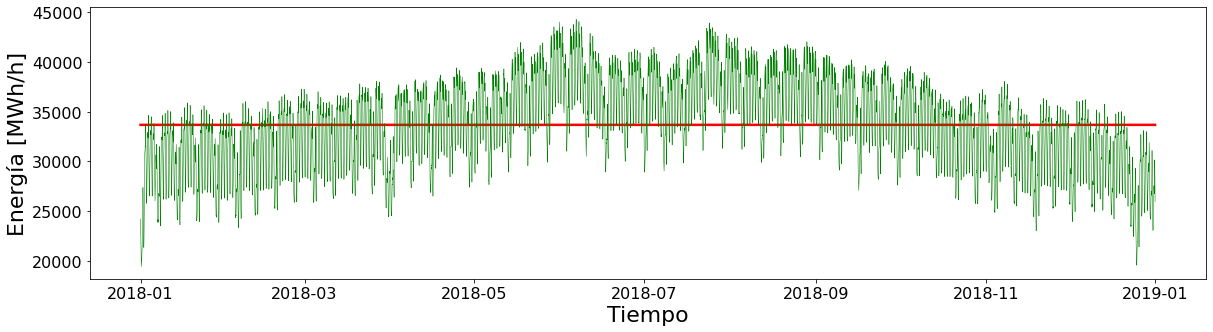

In [32]:
demanda["mean"] = demanda.SIN.mean()
plt.figure(figsize=(20,5))
plt.plot(demanda["mean"], color="red", linewidth=2.5)
plt.plot(demanda["SIN"], color="green", linewidth=0.5)
plt.xlabel("Tiempo",fontsize=22)
plt.ylabel("Energía [MWh/h]",fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [33]:
demanda

,Tiempo,CEN,NES,NOR,NTE,OCC,ORI,PEN,SIN,mean
Tiempo,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,2676.94600,8320.797000,1778.86500,1914.53200,2957.63000,6301.388000,266.166000,24216.324000,33682.429521
2018-01-01 01:00:00,2018-01-01 01:00:00,2488.61400,8034.734000,1502.07200,1929.59400,3022.96400,6085.509000,268.000000,23331.487000,33682.429521
2018-01-01 02:00:00,2018-01-01 02:00:00,2065.20600,7638.945000,1478.92800,1894.61900,3085.62700,6116.089000,266.964000,22546.378000,33682.429521
2018-01-01 03:00:00,2018-01-01 03:00:00,1763.00931,7411.874863,1472.89925,1863.02880,3069.79990,5987.084288,268.546170,21836.242582,33682.429521
2018-01-01 04:00:00,2018-01-01 04:00:00,1761.73800,6820.834000,1450.52000,1763.77700,3171.85800,5822.222000,269.896000,21060.845000,33682.429521
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2018-12-31 19:00:00,3509.99159,8884.646620,2155.56309,2443.57719,4201.59740,7370.370160,574.985826,29140.731876,33682.429521
2018-12-31 20:00:00,2018-12-31 20:00:00,3622.88152,8933.840720,2384.32414,2529.37948,4252.26790,7851.013500,585.283170,30158.990430,33682.429521
2018-12-31 21:00:00,2018-12-31 21:00:00,3300.48764,8870.925190,2200.49766,2533.81224,3849.17050,7564.690910,531.960433,28851.544573,33682.429521


In [34]:
#RENOMBRAMOS DEMANDA COMO UNA SERIE QUE CONTIENE ÚNICAMENTE LAS ESTAMPAS TEMPORALES DE LA DEMANDA DEL SIN
demanda = demanda.SIN
demanda

Tiempo
2018-01-01 00:00:00    24216.324000
2018-01-01 01:00:00    23331.487000
2018-01-01 02:00:00    22546.378000
2018-01-01 03:00:00    21836.242582
2018-01-01 04:00:00    21060.845000
                           ...     
2018-12-31 19:00:00    29140.731876
2018-12-31 20:00:00    30158.990430
2018-12-31 21:00:00    28851.544573
2018-12-31 22:00:00    27225.102750
2018-12-31 23:00:00    25966.794386
Name: SIN, Length: 8760, dtype: float64

In [35]:
#Dado que la información se encuentra en estampas temporales de 1 hora (y lo necesitamos en estampas temporales de 10 minutos,
#para poder empatar la información de datos de viento), procedemos a cambiar la frecuencia de la estampa temporal, haciendo la
#suposición de que la energía generada dentro de cada estampa temporal de 10 minutos es igual a 1/6 de la energía generada 
#durante la estampa temporal de 1 hora correspondiente.
demanda = demanda.asfreq("10Min",method="ffill")
demanda = demanda/6 #Ahora cada estampa temporal representa la energía generada promedio cada 10 minutos

In [36]:
#LA DEMANDA PROMEDIO DEL SIN CADA 10 MIN
demanda 

Tiempo
2018-01-01 00:00:00    4036.054000
2018-01-01 00:10:00    4036.054000
2018-01-01 00:20:00    4036.054000
2018-01-01 00:30:00    4036.054000
2018-01-01 00:40:00    4036.054000
                          ...     
2018-12-31 22:20:00    4537.517125
2018-12-31 22:30:00    4537.517125
2018-12-31 22:40:00    4537.517125
2018-12-31 22:50:00    4537.517125
2018-12-31 23:00:00    4327.799064
Freq: 10T, Name: SIN, Length: 52555, dtype: float64

<AxesSubplot:ylabel='Frequency'>

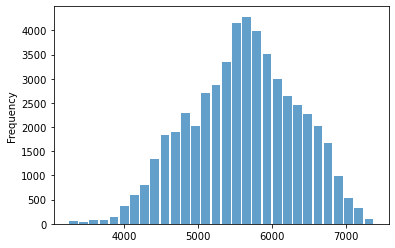

In [37]:
demanda.plot(kind="hist", bins=30, alpha=0.7, rwidth=0.85)

In [38]:
#Promedio de demanda (en intervalos diez-minutales)
demanda.mean()

5613.8606097274505

In [39]:
#Mediana
demanda.median()

5636.07992087111

In [40]:
#Máximo
demanda.max()

7381.191294593581

In [41]:
#Mínimo
demanda.min()

3241.3711666666663

In [42]:
(demanda.min()+demanda.max())/2

5311.281230630124

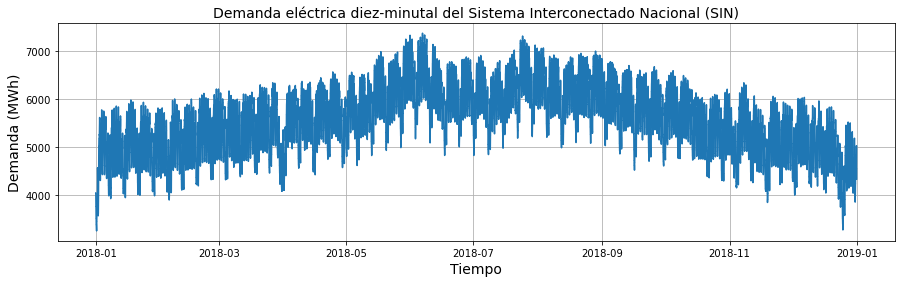

In [43]:
plt.figure(figsize=(15,4))
plt.plot(demanda)
plt.xlabel('Tiempo',fontsize=14)
plt.ylabel('Demanda (MWh)',fontsize=14)
plt.title('Demanda eléctrica diez-minutal del Sistema Interconectado Nacional (SIN)',fontsize=14)
plt.grid()

In [44]:
#¿En cuántos momentos es la demanda superior a la media?
demanda["TF"] = (demanda > demanda.mean())

In [45]:
#Respuesta a la anterior pregunta. True indica el número de veces que la demanda supera a la media
demanda["TF"].value_counts()

True     26988
False    25567
Name: SIN, dtype: int64

In [46]:
#Si la demanda es un momento determinado es superior a la medio, indicarlo con un número 3, si es inferior a la media con un 0.
#Con esto construimos los estados de demanda. Un estado de demanda baja (aquel debajo de la media) será indicado con un 0.
#Un Momento de demanda alta será indicado con un 3. La elección de generar 2 estados de demanda es arbitraria (pudieron ser 
#3 o 4 por ejemplo).
#Es importante especificar que los números 0 y 3 son meras etiquetas que identifican a un estado de demanda, sin embargo
#estas etiquetas se escogen como 0 y 3 para fines del análisis y construcción de los estados viento-demanda.
demanda["TF"].replace({True:3,False:0},inplace=True)

In [47]:
#Corroboramos. Este valor debe de ser 3 veces el valor de True que indica el número de veces que la demanda supera a la media
demanda["TF"].sum()

80964

In [48]:
#Estos valores deben coincidir con los valores del dataframe llamado df_estados
dfinal2["Total"].value_counts()

4.0    13036
3.0    12024
5.0     9452
2.0     8598
6.0     4315
1.0     3332
7.0      956
0.0      847
Name: Total, dtype: int64

In [49]:
dfinal2["Mes"] = dfinal2.index.strftime('%b') 
dfinal2["Día_semana"] = dfinal2.index.strftime('%a')
dfinal2["Estación"] = pd.cut((dfinal2.index.dayofyear) % 365,[0, 80, 172, 264, 355],
                        labels=["Invierno", "Primavera", "Verano", "Otoño"])
dfinal2["Estación"].fillna("Invierno", inplace=True)
dfinal2

,Ventosa1,Rumorosa3,Rumorosa4,Mérida1,Mérida3,Ojuelos2,Ojuelos4,Cuahutemoc2,Cuahutemoc4,San Fernando1,San Fernando3,Tepexi1,Tepexi3,Total,Mes,Día_semana,Estación
date,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno
2018-01-01 00:10:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno
2018-01-01 00:20:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno
2018-01-01 00:30:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno
2018-01-01 00:40:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,Jan,Mon,Invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,Dec,Mon,Invierno
2018-12-31 23:20:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,Dec,Mon,Invierno
2018-12-31 23:30:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,Dec,Mon,Invierno


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

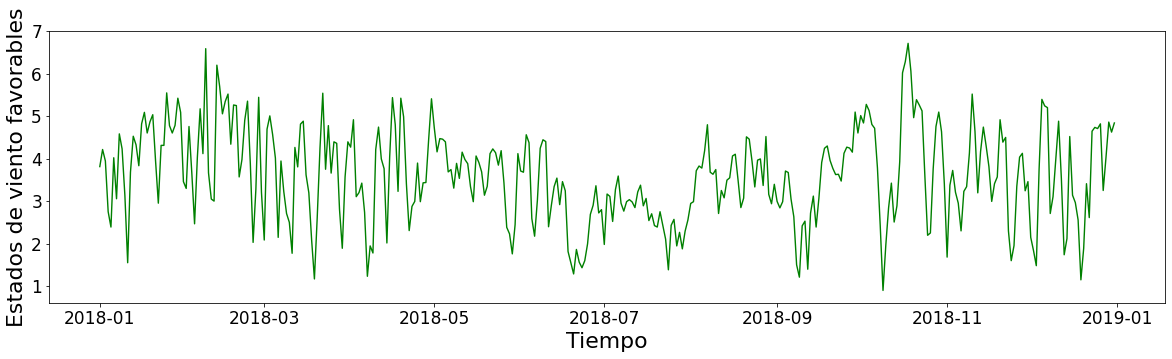

In [50]:
plt.figure(figsize=(20,5))
plt.plot(dfinal2.resample("D").mean()["Total"], color="green", linewidth=1.4)
plt.ylabel("Estados de viento favorables", fontsize=22)
plt.xlabel("Tiempo", fontsize=22)
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=17)

Text(0.5, 0, 'Tiempo')

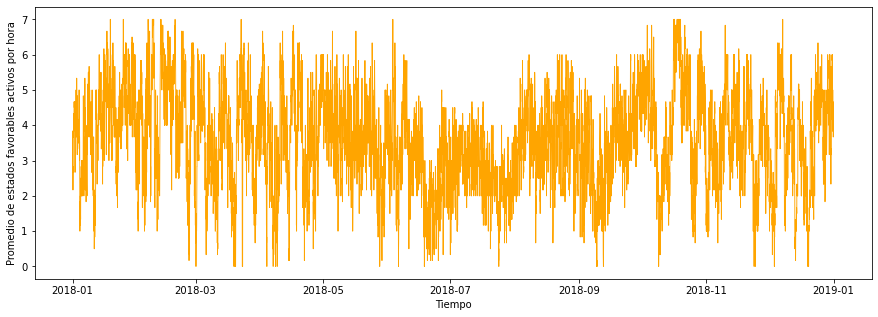

In [51]:
plt.figure(figsize=(15,5))
plt.plot(dfinal2.resample("H").mean()["Total"], color="orange", linewidth=0.9)
plt.ylabel("Promedio de estados favorables activos por hora")
plt.xlabel("Tiempo")
#ES COMO UNA CADENA DE MARKOV

Text(0.5, 0, 'Tiempo')

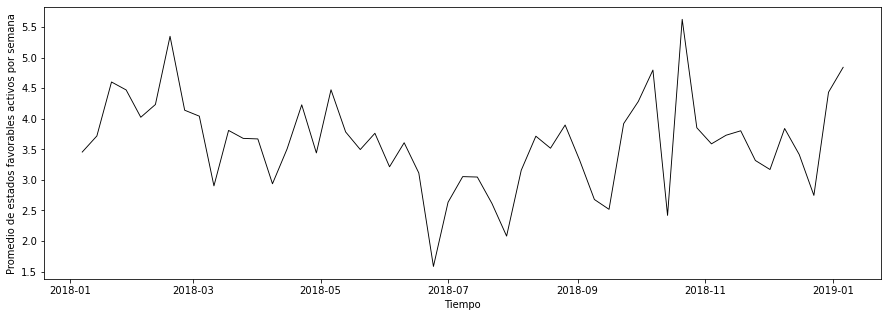

In [52]:
plt.figure(figsize=(15,5))
plt.plot(dfinal2.resample("W").mean()["Total"], color="black", linewidth=0.9)
plt.ylabel("Promedio de estados favorables activos por semana")
plt.xlabel("Tiempo")

C:\Users\MpBailon\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


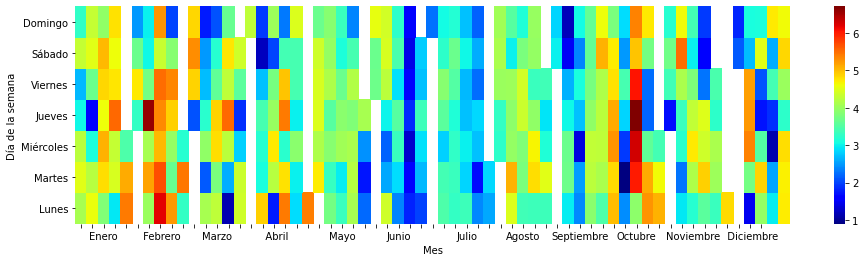

In [54]:
datos = dfinal["Total"].groupby(by=[dfinal.index.month,dfinal.index.week,dfinal.index.dayofweek]).mean().unstack().T

fig, ax = plt.subplots(figsize=(16,4))
y_axis_labels = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
x_axis_labels = ["","","Enero","","","",""," Febrero","","","","","Marzo","","","","","   Abril ","","",
                "","","","Mayo","","","","","Junio","","","","","","Julio","","","","","Agosto","","",
                "","","Septiembre","","","","","Octubre","","","","","Noviembre","","","","","  Diciembre",""]
ax = sns.heatmap(datos, cmap="jet",yticklabels=y_axis_labels,xticklabels=x_axis_labels)
plt.ylabel("Día de la semana")
plt.xlabel("Mes")
ax.set_ylim(0,7);

<AxesSubplot:xlabel='Mes', ylabel='Total'>

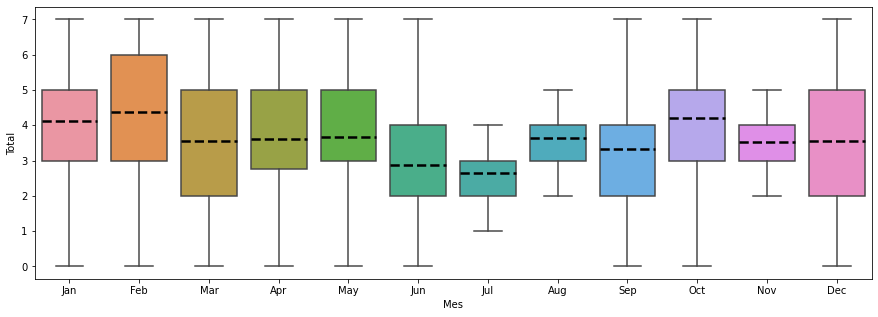

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(data= dfinal2, x = "Mes", y="Total",showmeans=True, meanline=True, meanprops=dict(linewidth=2.5, color="black"), #Creamos la línea de la media
                           flierprops=dict(markerfacecolor="white",markersize=0.75, markeredgecolor="white"),
                           medianprops=dict(linewidth=0))

Text(0.5, 0, 'Hora')

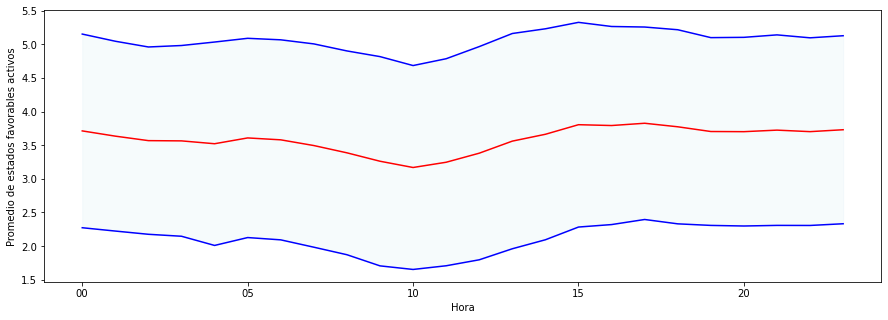

In [56]:
promedio = dfinal2.groupby(by = [dfinal2.index.strftime("%H")]).mean()["Total"]
desviacion_estandar = dfinal2.groupby(by = [dfinal2.index.strftime("%H")]).std()["Total"]
y1 = promedio-desviacion_estandar
y2 = promedio+desviacion_estandar
leyenda = ["Promedio","Desviación estándar"]
color = "blue"
color1 = "lightblue"
plt.figure(figsize=(15,5))
promedio.plot(color="red")
y1.plot(color=color)
y2.plot(color=color)
plt.fill_between(promedio.index,y1,y2, color=color1, alpha=0.1)
# plt.legend(leyenda)
plt.ylabel("Promedio de estados favorables activos")
plt.xlabel("Hora")

Text(0.5, 0, 'Hora')

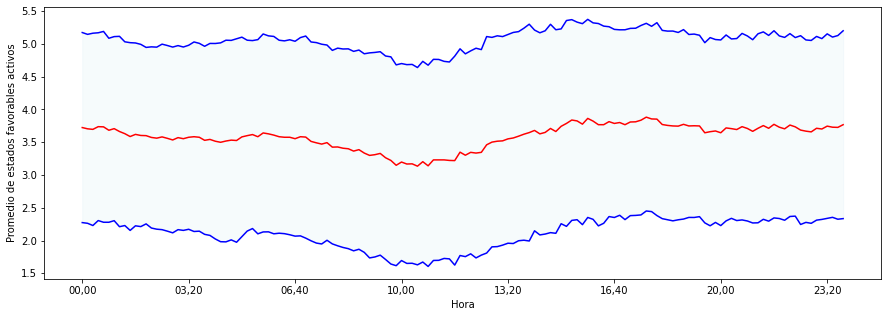

In [57]:
promedio = dfinal2.groupby(by = [dfinal2.index.strftime("%H,%M")]).mean()["Total"]
desviacion_estandar = dfinal2.groupby(by = [dfinal2.index.strftime("%H,%M")]).std()["Total"]
y1 = promedio-desviacion_estandar
y2 = promedio+desviacion_estandar
leyenda = ["Promedio","Desviación estándar"]
color = "blue"
color1 = "lightblue"
plt.figure(figsize=(15,5))
promedio.plot(color="red")
y1.plot(color=color)
y2.plot(color=color)
plt.fill_between(promedio.index,y1,y2, color=color1, alpha=0.1)
# plt.legend(leyenda)
plt.ylabel("Promedio de estados favorables activos")
plt.xlabel("Hora")

In [58]:
#Generamos los 3 "Estados de viento grupales". Si en un momento determinado se tienen 0,1 ó 2 Estados de viento 
#productores activos se considera un estado de viento grupal pobre, por lo que se le asignará el número 1.
#Si se encuentran activos 3 ó 4 Estados de viento productores, se considera un estado o de viento regular.
#Si se tienen 5,6 ó 7 Estados de viento productores, se considera un "estado de viento" rico.
#Hay que tener en cuenta que esta clasificación es arbitraria. Se consideró de esta forma teniendo en cuenta 
#el número de "estados de viento-demanda" finales que se desean obtener en el análisis (lo cual depende del análsis), 
#considerando que el tener ya sea demasiados o muy pocos "estados de viento" puede ocultar la información esencial del análisis.
#Por ejemplo, se pudo decidir considerar 7 "Momentos de viento", donde el tener 0 Estados de viento productivos activos 
#se considerara un estado de viento grupal pésimo, y el tener 7 Estados de viento productivos activos se considerara 
#un estado de viento excelente. De la misma forma, se pudo eligir simplemente dividir
#en sólo dos estados de viento, a saber estado de viento grupal malo (0,1,2,3 Estados de viento productivos activos) y 
#estado de viento grupal bueno (conformado por los restantes).

dfinal2["Estado"] = dfinal2["Total"].map({0.0:1,1.0:1,2.0:1,3.0:2,4.0:2,5.0:3,6.0:3,7.0:3})

In [59]:
#Con esta serie temporal es posible construir su cadena de Markov asociada. La cual permita cuantificar la dinámica de los
#"estados de viento grupales"
dfinal2["Estado"]

date
2018-01-01 00:00:00    2
2018-01-01 00:10:00    2
2018-01-01 00:20:00    2
2018-01-01 00:30:00    2
2018-01-01 00:40:00    2
                      ..
2018-12-31 23:10:00    2
2018-12-31 23:20:00    2
2018-12-31 23:30:00    2
2018-12-31 23:40:00    2
2018-12-31 23:50:00    2
Name: Estado, Length: 52560, dtype: int64

In [60]:
#Total de apariciones de cada estado de viento grupal
dfinal2["Estado"].value_counts() 

2    25060
3    14723
1    12777
Name: Estado, dtype: int64

In [61]:
#Calculamos el porcentaje de tiempo de cada estado de viento grupal
dfinal2["Estado"].value_counts(normalize=True) 

2    0.476788
3    0.280118
1    0.243094
Name: Estado, dtype: float64

In [62]:
#EXPORTAMOS DATA_FINAL2["ESTADO"] COMO ESTADOS_VIENTO_NOMENCLATURA
dfinal2["Estado"].to_csv("Estados_viento_nomenclatura.csv")

In [63]:
#Cambiamos el nombre del índice de dfinal2 (pasa de llamarse "date a llamarse "Tiempo"). Recordemos que dfinal2 contiene
#la información de los Momentos de viento.
dfinal2.index.names = ["Tiempo"]
dfinal2

,Ventosa1,Rumorosa3,Rumorosa4,Mérida1,Mérida3,Ojuelos2,Ojuelos4,Cuahutemoc2,Cuahutemoc4,San Fernando1,San Fernando3,Tepexi1,Tepexi3,Total,Mes,Día_semana,Estación,Estado
Tiempo,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno,2
2018-01-01 00:10:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno,2
2018-01-01 00:20:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno,2
2018-01-01 00:30:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,Jan,Mon,Invierno,2
2018-01-01 00:40:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,Jan,Mon,Invierno,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,Dec,Mon,Invierno,2
2018-12-31 23:20:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,Dec,Mon,Invierno,2
2018-12-31 23:30:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,Dec,Mon,Invierno,2


In [64]:
#FALTA ÚNICAMENTE LA ÚLTIMA HORA EN LA SERIE DE DEMANDA.
#Se construye la cadena de Estados de viento-demanda. Con esto, el valor de 1 indica la suma de (Estado de viento grupal poco 
#productor:1 más estado de demanda baja:0, lo cual nos da un Estado de viento-demanda de 1 que denominamos Bajo/Baja.)
#De esta forma, construimos los estados de viento-demanda, los cuales son 6 (dado de las 6 combinaciones posibles de los 
#estados de viento grupales y los estados de demanda). Por ejemplo; un estado de demanda alta (3) y 
#un estado de viento regular (2) nos da 5, lo que se denomina Estado de viento_demanda Alta/Regular.
def juntar2(left, right):
    return pd.merge(left, right, on='Tiempo', how='outer')
viento_demanda = reduce(juntar2, [demanda["TF"],dfinal2["Estado"]])
viento_demanda = viento_demanda.rename(columns = {"SIN":"Estado_demanda"})
viento_demanda["Estado_viento_demanda"] = viento_demanda["Estado"] + viento_demanda["Estado_demanda"]
viento_demanda

,Estado_demanda,Estado,Estado_viento_demanda
Tiempo,,,
2018-01-01 00:00:00,0.0,2,2.0
2018-01-01 00:10:00,0.0,2,2.0
2018-01-01 00:20:00,0.0,2,2.0
2018-01-01 00:30:00,0.0,2,2.0
2018-01-01 00:40:00,0.0,2,2.0
...,...,...,...
2018-12-31 23:10:00,NaN,2,NaN
2018-12-31 23:20:00,NaN,2,NaN
2018-12-31 23:30:00,NaN,2,NaN


In [65]:
#Número de apariciones totales de cada estados de viento-demanda
viento_demanda["Estado_viento_demanda"].value_counts()

5.0    13361
2.0    11694
3.0     8021
4.0     6925
6.0     6702
1.0     5852
Name: Estado_viento_demanda, dtype: int64

In [66]:
#Porcentajes de apariciones de estados de viento-demanda
viento_demanda["Estado_viento_demanda"].value_counts(normalize=True)

5.0    0.254229
2.0    0.222510
3.0    0.152621
4.0    0.131767
6.0    0.127524
1.0    0.111350
Name: Estado_viento_demanda, dtype: float64

In [67]:
#Damos los nombre a los estados de viento_demanda. La nomenclatura es Viento-Demanda. Se obtienen 6 combinaciones posibles.
viento_demanda["Nomenclatura"] = viento_demanda["Estado_viento_demanda"].map({1.0:"Pobre-Baja",2.0:"Regular-Baja",3.0:
                                    "Rico-Baja",4.0:"Pobre-Alta",5.0:"Regular-Alta",6.0:"Rico-Alta"})
    

In [68]:
viento_demanda.count()

Estado_demanda           52555
Estado                   52560
Estado_viento_demanda    52555
Nomenclatura             52555
dtype: int64

(array([ 300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
        1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

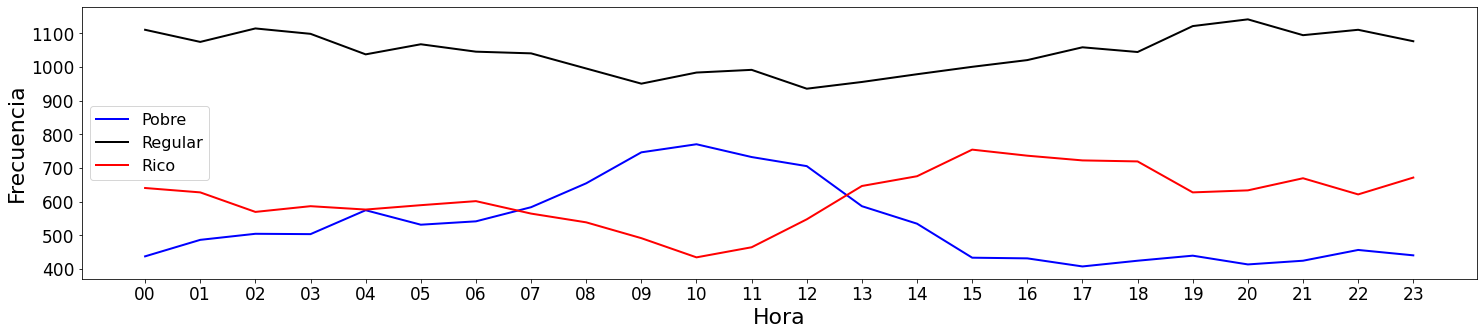

In [69]:
plt.figure(figsize=[25,5])
viento_pobre = viento_demanda[viento_demanda["Estado"] == 1]
viento_regular = viento_demanda[viento_demanda["Estado"] == 2]
viento_rico = viento_demanda[viento_demanda["Estado"] == 3]
plt.plot(viento_pobre.groupby(by = [viento_pobre.index.strftime("%H")]).count()["Estado"], linewidth=2, color="blue")
plt.plot(viento_regular.groupby(by = [viento_regular.index.strftime("%H")]).count()["Estado"], linewidth=2, color = "black")
plt.plot(viento_rico.groupby(by = [viento_rico.index.strftime("%H")]).count()["Estado"],linewidth=2, color = "red")
# plt.plot(pobre_baja.groupby(by = [pobre_baja.index.strftime("%H")]).count()["Estado"])
# plt.plot(pobre_alta.groupby(by = [pobre_alta.index.strftime("%H")]).count()["Estado_viento_demanda"])
plt.legend(["Pobre","Regular","Rico"], fontsize=16)
# plt.legend(["Pobre","Regular","Rico","Pobre-baja"Parámetros estados.ipynb"Pobre-alta"])
plt.xlabel("Hora",fontsize=22)
plt.ylabel("Frecuencia",fontsize=22)
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=17)

Text(0, 0.5, 'Estado de viento grupal')

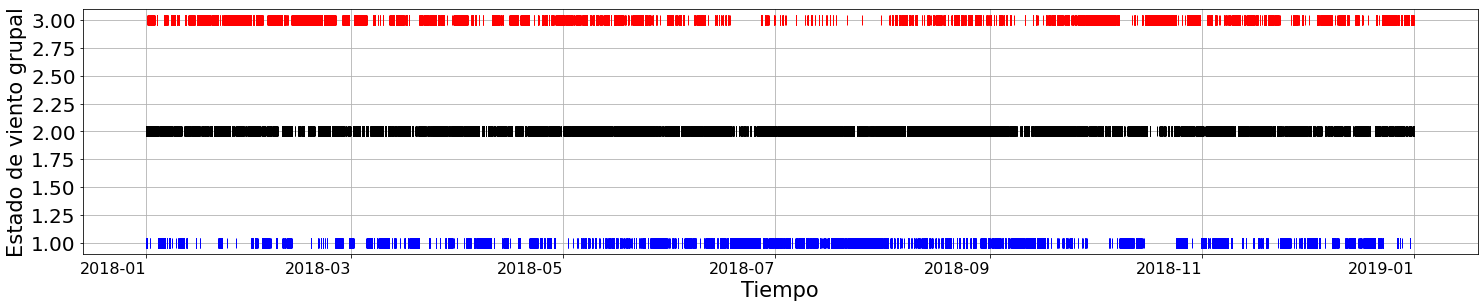

In [70]:
pobre = viento_demanda[viento_demanda["Estado"] == 1]
regular = viento_demanda[viento_demanda["Estado"] == 2]
rico = viento_demanda[viento_demanda["Estado"] == 3]
plt.figure(figsize=(25,5))
pobre.Estado.plot(marker="|",markersize=10,linewidth=0.001, linestyle="None",alpha=1,grid=True, color="blue")
regular.Estado.plot(marker="|",markersize=10,linestyle="None",alpha=1,grid=True,color="black")
rico.Estado.plot(marker="|",markersize=10,linestyle="None",alpha=1,grid=True,color="red")
# plt.legend(["Pobre-baja","Regular-baja","Rico-baja","Pobre-alta","Regular-alta","Rico-alta"],bbox_to_anchor=(1.01,0.7))
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=20)
plt.xlabel("Tiempo", fontsize=21)
plt.ylabel("Estado de viento grupal", fontsize=21)

Text(0, 0.5, 'Frecuencia')

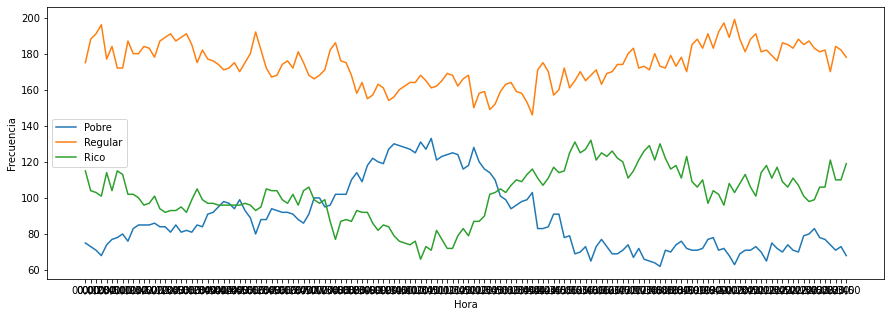

In [71]:
plt.figure(figsize=[15,5])
viento_pobre = viento_demanda[viento_demanda["Estado"] == 1]
viento_regular = viento_demanda[viento_demanda["Estado"] == 2]
viento_rico = viento_demanda[viento_demanda["Estado"] == 3]
plt.plot(viento_pobre.groupby(by = [viento_pobre.index.strftime("%H,%M")]).count()["Estado"])
plt.plot(viento_regular.groupby(by = [viento_regular.index.strftime("%H,%M")]).count()["Estado"])
plt.plot(viento_rico.groupby(by = [viento_rico.index.strftime("%H,%M")]).count()["Estado"])
# plt.plot(pobre_baja.groupby(by = [pobre_baja.index.strftime("%H")]).count()["Estado"])
# plt.plot(pobre_alta.groupby(by = [pobre_alta.index.strftime("%H")]).count()["Estado_viento_demanda"])
plt.legend(["Pobre","Regular","Rico"])
# plt.legend(["Pobre","Regular","Rico","Pobre-baja"Parámetros estados.ipynb"Pobre-alta"])
plt.xlabel("Hora")
plt.ylabel("Frecuencia")

In [72]:
pobre_alta = viento_demanda[viento_demanda["Estado_viento_demanda"] == 4]
pobre_alta

,Estado_demanda,Estado,Estado_viento_demanda,Nomenclatura
Tiempo,,,,
2018-01-04 20:00:00,3.0,1,4.0,Pobre-Alta
2018-01-04 20:10:00,3.0,1,4.0,Pobre-Alta
2018-01-04 20:20:00,3.0,1,4.0,Pobre-Alta
2018-01-04 20:30:00,3.0,1,4.0,Pobre-Alta
2018-01-04 20:40:00,3.0,1,4.0,Pobre-Alta
...,...,...,...,...
2018-12-19 21:10:00,3.0,1,4.0,Pobre-Alta
2018-12-19 21:20:00,3.0,1,4.0,Pobre-Alta
2018-12-19 21:30:00,3.0,1,4.0,Pobre-Alta


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

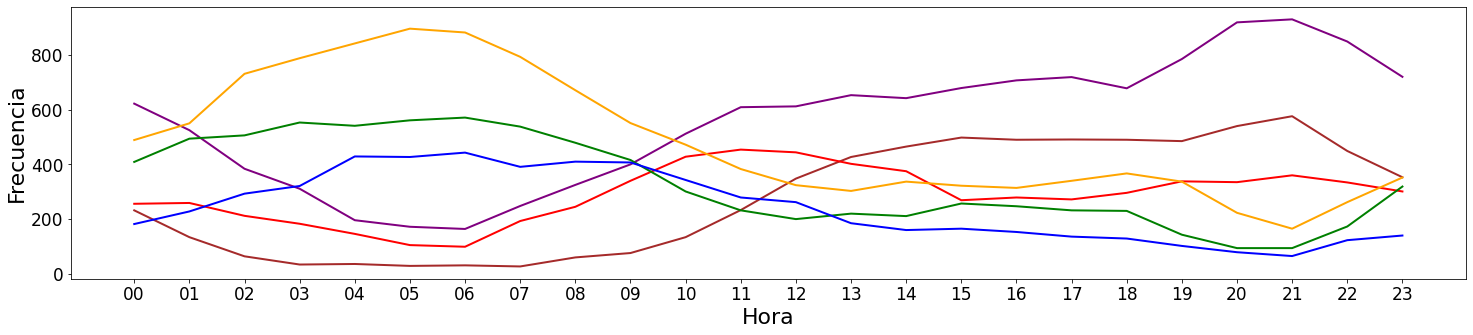

In [73]:
plt.figure(figsize=[25,5])
pobre_baja = viento_demanda[viento_demanda["Estado_viento_demanda"] == 1]
regular_baja = viento_demanda[viento_demanda["Estado_viento_demanda"] == 2]
rico_baja = viento_demanda[viento_demanda["Estado_viento_demanda"] == 3]
pobre_alta = viento_demanda[viento_demanda["Estado_viento_demanda"] == 4]
regular_alta = viento_demanda[viento_demanda["Estado_viento_demanda"] == 5]
rico_alta = viento_demanda[viento_demanda["Estado_viento_demanda"] == 6]
plt.plot(rico_alta.groupby(by = [rico_alta.index.strftime("%H")]).count()["Estado_viento_demanda"],color="brown",linewidth=2)
plt.plot(regular_alta.groupby(by = [regular_alta.index.strftime("%H")]).count()["Estado_viento_demanda"],color="purple",linewidth=2)
plt.plot(pobre_alta.groupby(by = [pobre_alta.index.strftime("%H")]).count()["Estado_viento_demanda"],color="red",linewidth=2)
plt.plot(rico_baja.groupby(by = [rico_baja.index.strftime("%H")]).count()["Estado_viento_demanda"],color="green",linewidth=2)
plt.plot(regular_baja.groupby(by = [regular_baja.index.strftime("%H")]).count()["Estado_viento_demanda"],color="orange",linewidth=2)
plt.plot(pobre_baja.groupby(by = [pobre_baja.index.strftime("%H")]).count()["Estado_viento_demanda"],color="blue",linewidth=2)
# plt.legend(["Rico-alta","Regular-alta","Pobre-alta","Rico-baja","Regular-baja", "Pobre-baja"])
plt.xlabel("Hora",fontsize=22)
plt.ylabel("Frecuencia",fontsize=22)
plt.xticks(rotation=0, fontsize=17)
plt.yticks(fontsize=17)

<AxesSubplot:ylabel='Nomenclatura'>

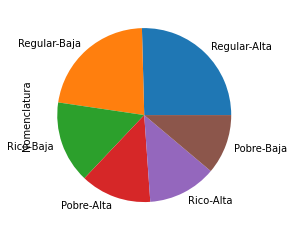

In [74]:
viento_demanda["Nomenclatura"].value_counts().plot.pie()

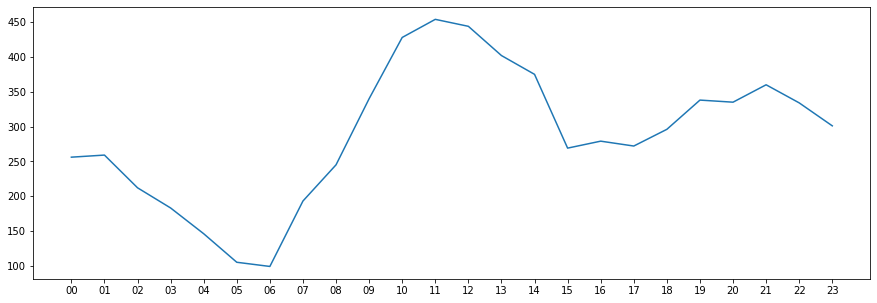

In [75]:
plt.figure(figsize=[15,5])
plt.plot(pobre_alta.groupby(by = [pobre_alta.index.strftime("%H")]).count()["Estado_viento_demanda"])

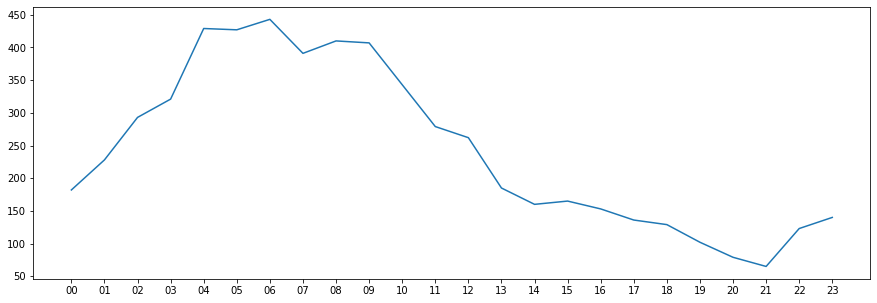

In [76]:
pobre_baja = viento_demanda[viento_demanda["Estado_viento_demanda"] == 1]
plt.figure(figsize=[15,5])
plt.plot(pobre_baja.groupby(by = [pobre_baja.index.strftime("%H")]).count()["Estado"])

Text(0, 0.5, 'Estado viento-demanda')

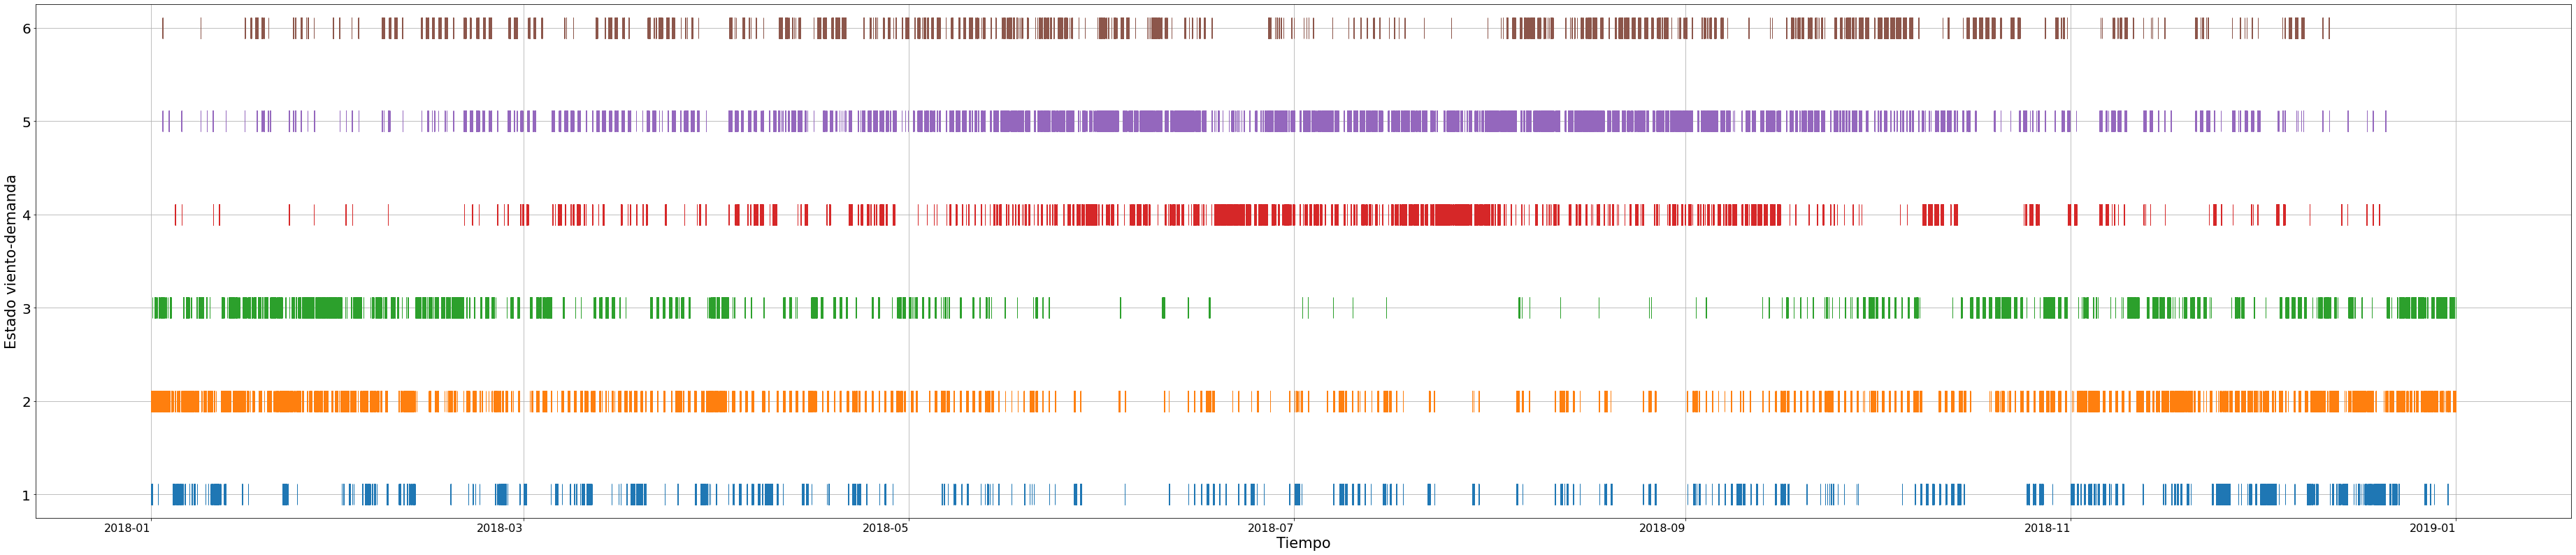

In [77]:
pobre_baja = viento_demanda[viento_demanda["Estado_viento_demanda"] == 1]
regular_baja = viento_demanda[viento_demanda["Estado_viento_demanda"] == 2]
rico_baja = viento_demanda[viento_demanda["Estado_viento_demanda"] == 3]
pobre_alta = viento_demanda[viento_demanda["Estado_viento_demanda"] == 4]
regular_alta = viento_demanda[viento_demanda["Estado_viento_demanda"] == 5]
rico_alta = viento_demanda[viento_demanda["Estado_viento_demanda"] == 6]
plt.figure(figsize=(65,15))
pobre_baja.Estado_viento_demanda.plot(marker="|",markersize=30,linewidth=0.001, linestyle="None",alpha=1,grid=True)
regular_baja.Estado_viento_demanda.plot(marker="|",markersize=30,linestyle="None",alpha=1,grid=True)
rico_baja.Estado_viento_demanda.plot(marker="|",markersize=30,linestyle="None",alpha=1,grid=True)
pobre_alta.Estado_viento_demanda.plot(marker="|",markersize=30,linestyle="None",alpha=1,grid=True)
regular_alta.Estado_viento_demanda.plot(marker="|",markersize=30,linestyle="None",alpha=1,grid=True)
rico_alta.Estado_viento_demanda.plot(marker="|",markersize=30,linestyle="None",alpha=1,grid=True)
# plt.legend(["Pobre-baja","Regular-baja","Rico-baja","Pobre-alta","Regular-alta","Rico-alta"],bbox_to_anchor=(1.01,0.7))
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=20)
plt.xlabel("Tiempo", fontsize=21)
plt.ylabel("Estado viento-demanda", fontsize=21)
# plt.savefig("Disponibilidad_estados_viento_demanda")
#CADENA DE MARKOV A TROZOS

In [78]:
viento_demanda.to_csv("Viento_demanda_final.csv")

In [79]:
cadenademanda = demanda["TF"].replace({3:1})

In [80]:
cadenademanda.to_csv("cadenademanda.csv")